In [15]:
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline  
inv = np.linalg.inv
plt.style.use('ggplot')

In [16]:
# import data
with open('online_news_popularity.csv', 'r') as f:
    reader = csv.reader(f)
    a = list(reader)
    labels = a[0]
    data = np.array(a[1:])
data.shape

(39644, 61)

In [17]:
# convert the data into a convenient array
data = data[:,1:]
arrToFloat = np.vectorize(float)
data = arrToFloat(data)
shares = np.log(data[:,-1])

In [18]:
# split data into training and test data
dataRatio = .1
trainingrows = int(data.shape[0]*dataRatio)
trdata = data[0:trainingrows, :]
trshares = shares[0:trainingrows]
tstdata = data[trainingrows:, :]
tstshares = shares[trainingrows:]

In [19]:
# compare gradient descent to closed form solution

trshares.reshape(trshares.shape[0],1)

# initialize weights randomly
b = np.random.randn(1)
weights = np.random.randn(trdata.shape[1])

# define learning parameters
wlrn = 2.5e-16
blrn = 2.5e-4
normconst = 100
iterations = 100

# norm constant matrix, Gamma^T Gamma
gamma = normconst * np.identity(trdata.shape[1])

# reduce redundant calculations
normterm = trdata.T @ trdata + gamma
onecol = np.ones((trdata.shape[0],1))
yterm = sum(trshares)

overNterm = trdata.T @ onecol @ onecol.T @ trdata / trdata.shape[0]

# calculate closed form solution
identTerm = trdata.T @ (np.eye(trdata.shape[0]) - 1.0/trdata.shape[0])
ident = np.identity(trdata.shape[0])

toinv = (trdata.T @ trdata  + gamma.T @ gamma - overNterm)

otherterm = trdata.T @ trshares - trdata.T @ onecol @ onecol.T @ trshares / trdata.shape[0]

xstar = np.linalg.solve(toinv, otherterm)

bstar = trshares.T @ onecol -  (xstar.T @ trdata.T @ onecol)/trdata.shape[0]

def dist(w,b): # weights, b, real weights, real b
    wdif = w.T - xstar.T
    bdif = b - bstar
    return (wdif.T @ wdif  + bdif**2)**.5

# dists for plot
dists = []
iters = list(range(iterations))

# run gradient descent
for i in iters:
    # calculate gradient w.r.t. weights and deriv w.r.t b
    gradw = normterm @ weights + trdata.T @ (b * np.ones(trshares.shape[0]) - trshares)
    derivb = weights.T @ trdata.T @ onecol - yterm + b * trdata.shape[0]
    
    # update weights and b
    weights = weights - wlrn * gradw
    b = b - blrn * derivb
    
    # get distance from ideal solution
    dists += [dist(weights,b)]
    
    error = np.dot(tstdata, weights) - tstshares
    #print([1/tstdata.shape[0] * np.dot(error,error)**.5]) # calc. RMSE


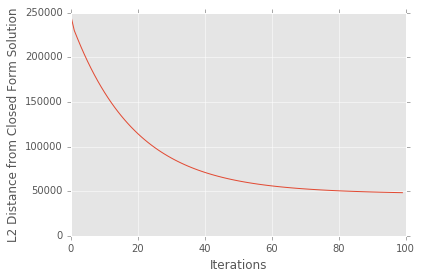

In [20]:
plt.xlabel("Iterations")
plt.ylabel("L2 Distance from Closed Form Solution")

plt.plot(iters,dists)